In [1]:
import sys
sys.path.append("/Users/hzhan/documents/work/survival")

In [2]:
import numpy as np
from src.evaluate.time_dependent_auc import *

In [3]:
survival_data = TimeDependentAUC()

In [4]:
num_columns = ['age', 'creatinine', 'kappa', 'lambda']
x_test_imputed = survival_data.impute_data(num_columns)
times = np.percentile(survival_data.y["futime"], np.linspace(5, 81, 15))

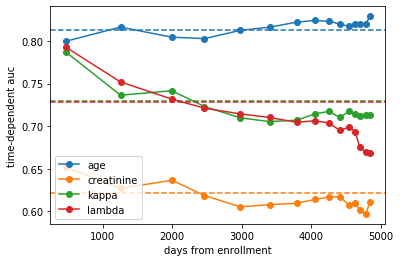

In [5]:
# We begin by considering individual real-valued features as risk scores 
# without actually fitting a survival model. Hence, we obtain an estimate 
# of how well age, creatinine, kappa FLC, and lambda FLC are able to distinguish 
# cases from controls at each time point.
for i, col in enumerate(num_columns):
    survival_data.plot_cumulative_dynamic_auc(x_test_imputed[:, i], col, color="C{}".format(i))
    ret = concordance_index_ipcw(survival_data.y_train, survival_data.y_test, x_test_imputed[:, i], tau=times[-1])


## Time Dependent AUC

In [6]:
Models = EvaluateModel()

In [7]:
Models.va_x_train

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
66,38.0,large,80.0,5.0,no,standard
121,62.0,adeno,80.0,4.0,yes,test
107,60.0,adeno,40.0,2.0,no,test
57,47.0,large,70.0,2.0,no,standard
98,72.0,smallcell,70.0,3.0,no,test
...,...,...,...,...,...,...
126,68.0,large,70.0,15.0,yes,test
67,53.0,large,70.0,8.0,yes,standard
83,52.0,squamous,80.0,28.0,yes,test
5,49.0,squamous,20.0,5.0,no,standard


In [8]:
Models.va_y_train

array([( True, 103.), ( True,  84.), ( True,  24.), ( True, 553.),
       ( True,  99.), ( True,  21.), ( True,  48.), ( True,  59.),
       ( True, 278.), ( True,  18.), ( True,  15.), ( True, 242.),
       ( True, 287.), ( True,  95.), ( True,  19.), ( True,  30.),
       ( True,  80.), ( True, 999.), ( True,   8.), ( True, 991.),
       ( True, 389.), ( True,  27.), ( True, 467.), (False, 231.),
       ( True,  90.), ( True,  51.), ( True,  10.), ( True,  99.),
       ( True,  52.), ( True,   8.), ( True, 260.), ( True,  18.),
       ( True,  13.), ( True,  52.), ( True,  13.), ( True,   4.),
       (False, 123.), ( True,  61.), ( True, 411.), ( True,  19.),
       ( True,  29.), ( True,  31.), ( True,  31.), ( True, 117.),
       ( True,   7.), ( True,  25.), ( True, 118.), ( True,  54.),
       ( True,  25.), (False,  97.), ( True, 384.), ( True, 357.),
       ( True, 231.), ( True, 143.), ( True,   2.), ( True,   3.),
       ( True,  22.), ( True,   8.), ( True, 139.), ( True, 11

In [9]:
Models.cox_model()

In [10]:
Models.rsf_model()

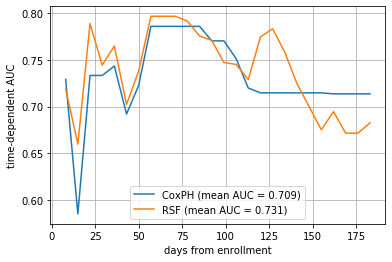

In [11]:
Models.plot_model_auc()

## Brier Score

In [12]:
from src.evaluate.brier_score import *

In [13]:
Models = Brier()

In [15]:
Models.cox_model()

In [16]:
Models.rsf_model()

In [17]:
Models.calculate_cindex()

In [18]:
Models.calculate_ibs()

In [20]:
pd.concat([Models.score_cindex, Models.score_brier], axis=1)

,c-index,IBS
RSF,0.688437,0.193610
CPH,0.688318,0.189498
Random,0.500000,0.247368
